In [4]:
from mhr.utils.utils import process_jsonl
what_word_log_file = "/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/llava_v1_5_mix665k_what_word_llama.jsonl"

what_word_data = process_jsonl(what_word_log_file)
what_word_dict = {}
for item in what_word_data:
    what_word_list = item["objects"].split(",")
    what_word_list = [x.strip() for x in what_word_list]
    for x in what_word_list:
        if what_word_dict.get(x) is None:
            what_word_dict[x] = 1
        else:
            what_word_dict[x] += 1
sorted_dict_by_value = sorted(what_word_dict.items(), key=lambda item: item[1],reverse=True)
sorted_value = [item[1] for item in sorted_dict_by_value]

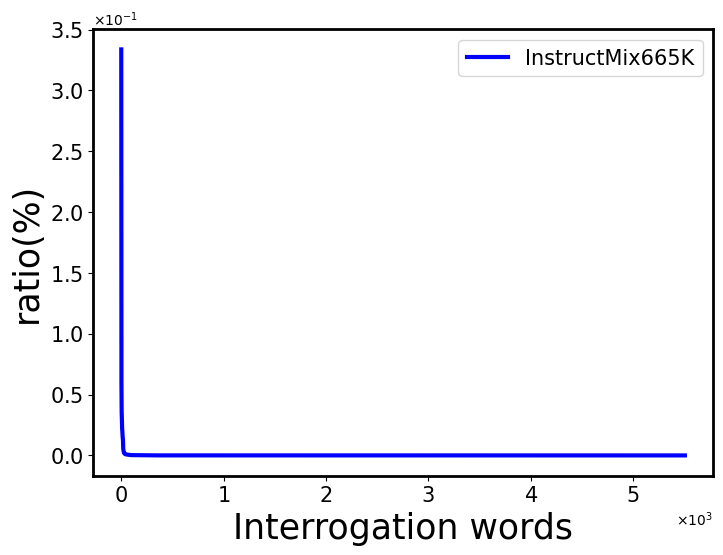

In [7]:
from matplotlib import pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 


# data = [a['r.count'] for a in results]
data = sorted_value
total = sum(data)
ratio = [a/total for a in data]
plt.figure(figsize=(8,5.8))
# plt.grid(True,axis='y',zorder=1)
# plt.plot(lcs_ratio, zorder=2
colors = [ '#ffe598', '#87edff', '#ff968d', '#b2ff89','#bc9eff','#bdbca5', 'grey', 'yellow','k','brown','grey','cyan',"pink"]
plt.plot(ratio, zorder=2, label="InstructMix665K",linewidth=3,color='blue')

# plt.ylim(0,0.0001)
plt.legend()
# plt.xticks([0,50,100,150,200,250,300,2500,2550],mme_title[3:10]+mme_title[-2:],rotation=90)
plt.ylabel('ratio(%)',fontsize=25)
plt.xlabel('Interrogation words',fontsize=25)
plt.legend(frameon=True,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.gca()

ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig("./res/instructmix_llama_what_word.pdf", format='pdf')
plt.show()